# Feature_Engineering Exercises
Do your work for this exercise in a jupyter notebook named ```feature_engineering``` within the ```regression-exercises``` repo. Add, commit, and push your work.

In [1]:
# standardized modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Decision Tree, Model & Feature Evaluation Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

#my modules
import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
#import QMCBT_[00]quick_tips as tips
#import QMCBT_[01]acquire as acquire
#import QMCBT_[02]prepare as prepare
#import QMCBT_[03]explore as explore
#import QMCBT_[04]evaluate as evaluate

# 1. Load the tips dataset.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<div class="alert alert-warning">


## Check WhiteSpace
    
</div>

In [5]:
# Return (row count)
row_count = df.shape[0]
row_count

244

In [6]:
# creates list of columns
column_list = df.columns
column_list

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
# returns count of all rows from each column that has values
# essentially skipping count on any row that has a column with whitespace
row_value_count = df[column_list].value_counts().sum()
row_value_count

244

In [8]:
# subtract value count from row count to get count of rows with whitespace
whitespace_count = row_count - row_value_count
whitespace_count

0

<div class="alert alert-warning">


## Convert Categorical
* sex
* smoker
* day
* time
    
</div>

In [9]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [10]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [11]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [12]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [13]:
df.sex = df.sex.replace('Male', 1)
df.sex = df.sex.replace('Female', 0)

df.smoker = df.smoker.replace('Yes', 1)
df.smoker = df.smoker.replace('No', 0)

df.time = df.time.replace('Dinner', 1)
df.time = df.time.replace('Lunch', 0)

In [14]:
df.head().T

,0,1,2,3,4
total_bill,16.99,10.34,21.01,23.68,24.59
tip,1.01,1.66,3.5,3.31,3.61
sex,0,1,1,1,0
smoker,0,0,0,0,0
day,Sun,Sun,Sun,Sun,Sun
time,1,1,1,1,1
size,2,3,3,2,4


<div class="alert alert-warning">

    
## Get Dummies

In [15]:
dummy_df = pd.get_dummies(data=df[['day']], drop_first=False)
dummy_df.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
day_Thur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
day_Fri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_Sat,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
day_Sun,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.concat([df, dummy_df], axis=1)

<div class="alert alert-warning">

    
## Rename Columns

In [17]:
df = df.rename(columns={"size": "party_size", "sex": "male_female", "time": "dinner_lunch"})

<div class="alert alert-warning">

    
## Drop Columns

In [18]:
df = df.drop(columns=['day'])

In [19]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
total_bill,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82,18.78
tip,1.01,1.66,3.50,3.31,3.61,4.71,2.00,3.12,1.96,3.23,...,3.00,1.25,1.0,1.17,4.67,5.92,2.00,2.00,1.75,3.00
male_female,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,0.00,1.00,0.00,1.00,1.00,0.00
smoker,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.0,1.00,0.00,0.00,1.00,1.00,0.00,0.00
dinner_lunch,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
party_size,2.00,3.00,3.00,2.00,4.00,4.00,2.00,4.00,2.00,2.00,...,2.00,2.00,2.0,2.00,3.00,3.00,2.00,2.00,2.00,2.00
day_Thur,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00
day_Fri,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
day_Sat,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00
day_Sun,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total_bill    244 non-null    float64 
 1   tip           244 non-null    float64 
 2   male_female   244 non-null    category
 3   smoker        244 non-null    category
 4   dinner_lunch  244 non-null    category
 5   party_size    244 non-null    int64   
 6   day_Thur      244 non-null    uint8   
 7   day_Fri       244 non-null    uint8   
 8   day_Sat       244 non-null    uint8   
 9   day_Sun       244 non-null    uint8   
dtypes: category(3), float64(2), int64(1), uint8(4)
memory usage: 7.9 KB


<div class="alert alert-warning">

    
## Change dtype

In [21]:
df = df.astype({"male_female": int, "smoker": int, "dinner_lunch": int})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_bill    244 non-null    float64
 1   tip           244 non-null    float64
 2   male_female   244 non-null    int64  
 3   smoker        244 non-null    int64  
 4   dinner_lunch  244 non-null    int64  
 5   party_size    244 non-null    int64  
 6   day_Thur      244 non-null    uint8  
 7   day_Fri       244 non-null    uint8  
 8   day_Sat       244 non-null    uint8  
 9   day_Sun       244 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 12.5 KB


* ## a. Create a column named ```price_per_person```. This should be the ```total bill``` divided by the ```party size```.

#### Feature Engineer

In [23]:
# Create price_per_person feature
df['price_per_person'] = round((df.total_bill / df.party_size), 2)
df

,total_bill,tip,male_female,smoker,dinner_lunch,party_size,day_Thur,day_Fri,day_Sat,day_Sun,price_per_person
0,16.99,1.01,0,0,1,2,0,0,0,1,8.49
1,10.34,1.66,1,0,1,3,0,0,0,1,3.45
2,21.01,3.50,1,0,1,3,0,0,0,1,7.00
3,23.68,3.31,1,0,1,2,0,0,0,1,11.84
4,24.59,3.61,0,0,1,4,0,0,0,1,6.15
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,3,0,0,1,0,9.68
240,27.18,2.00,0,1,1,2,0,0,1,0,13.59
241,22.67,2.00,1,1,1,2,0,0,1,0,11.34
242,17.82,1.75,1,0,1,2,0,0,1,0,8.91


* ## b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the ```tip amount```?

<div class="alert alert-info">


### ANSWER:
* ### sex and party_size

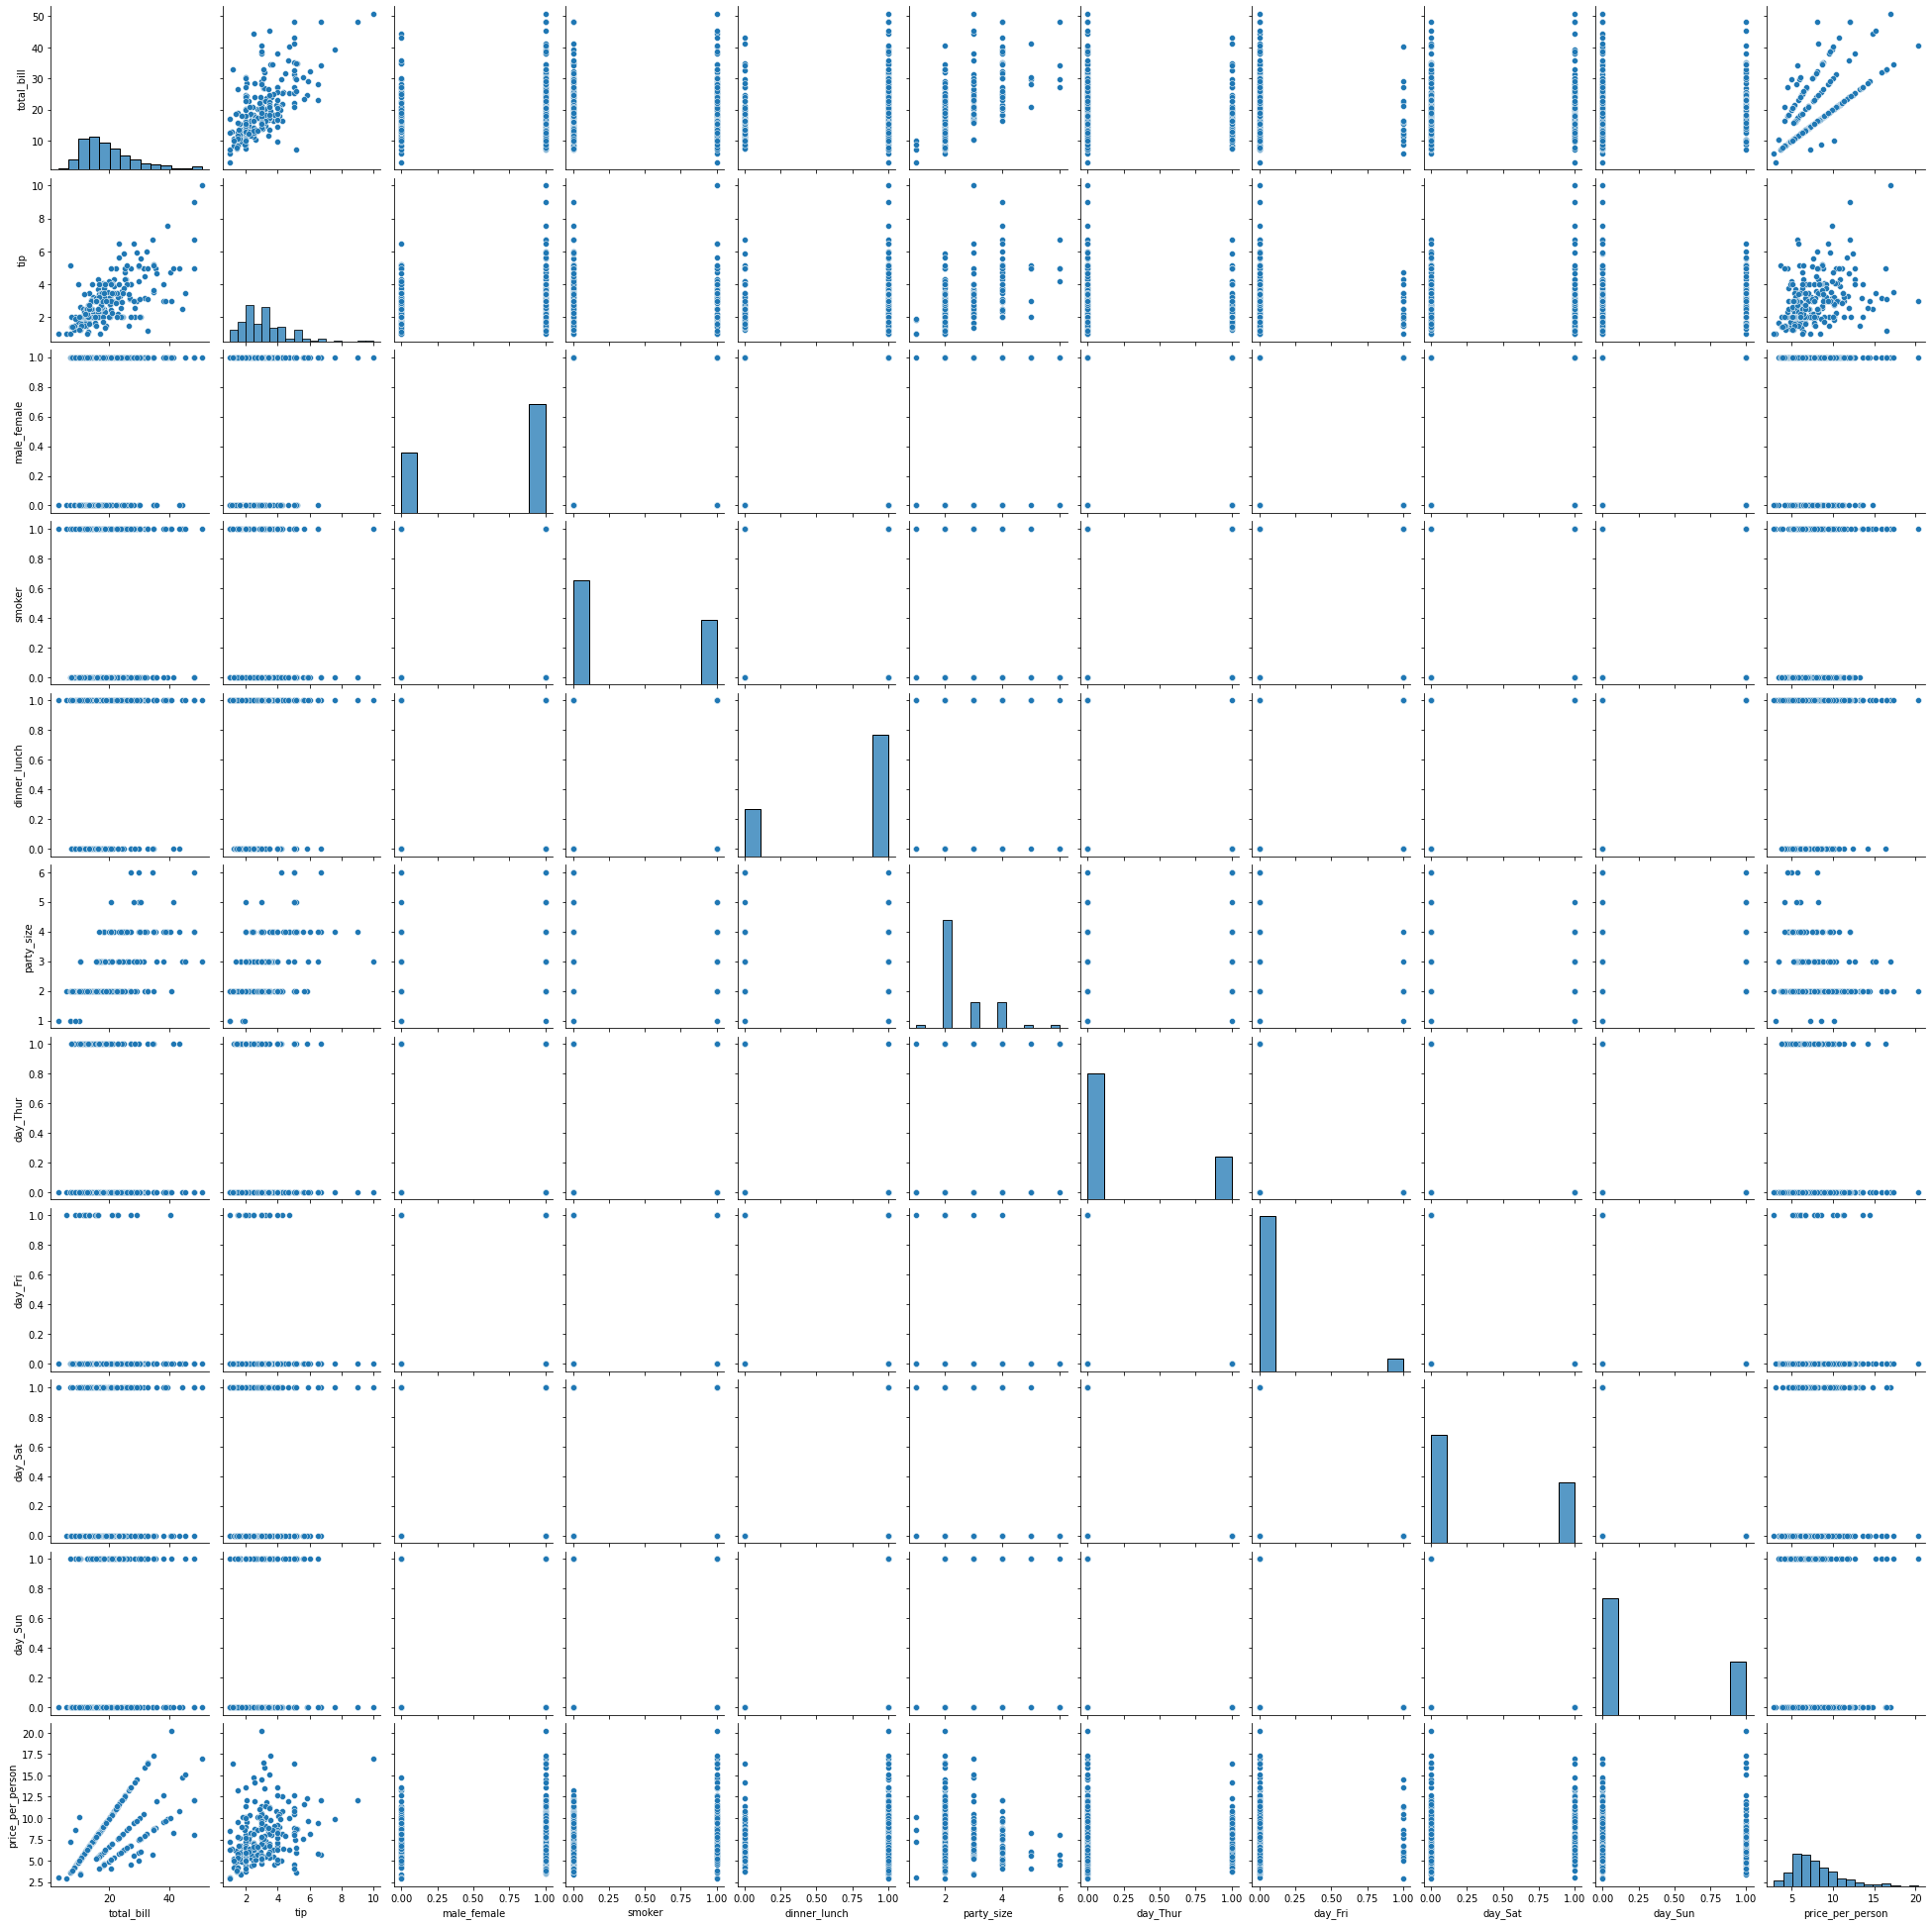

In [24]:
# PairPlot
sns.pairplot(data=df)

In [25]:
df.corr()

,total_bill,tip,male_female,smoker,dinner_lunch,party_size,day_Thur,day_Fri,day_Sat,day_Sun,price_per_person
total_bill,1.000000,0.675734,0.144877,0.085721,0.183118,0.598315,-0.138174,-0.086168,0.054919,0.122953,0.647554
tip,0.675734,1.000000,0.088862,0.005929,0.121629,0.489299,-0.095879,-0.055463,-0.002790,0.125114,0.347405
male_female,0.144877,0.088862,1.000000,0.002816,0.205231,0.086195,-0.194445,-0.071060,0.053957,0.168106,0.108485
smoker,0.085721,0.005929,0.002816,1.000000,0.054921,-0.133178,-0.128534,0.244316,0.155744,-0.181624,0.229916
dinner_lunch,0.183118,0.121629,0.205231,0.054921,1.000000,0.103411,-0.917996,-0.058159,0.462709,0.418071,0.122258
party_size,0.598315,0.489299,0.086195,-0.133178,0.103411,1.000000,-0.072598,-0.142184,-0.041121,0.193054,-0.175359
day_Thur,-0.138174,-0.095879,-0.194445,-0.128534,-0.917996,-0.072598,1.000000,-0.169608,-0.434480,-0.392566,-0.093121
day_Fri,-0.086168,-0.055463,-0.071060,0.244316,-0.058159,-0.142184,-0.169608,1.000000,-0.216319,-0.195451,0.024477
day_Sat,0.054919,-0.002790,0.053957,0.155744,0.462709,-0.041121,-0.434480,-0.216319,1.000000,-0.500682,0.076427
day_Sun,0.122953,0.125114,0.168106,-0.181624,0.418071,0.193054,-0.392566,-0.195451,-0.500682,1.000000,-0.005669


* ## c. Use ```select k best``` to select the top 2 features for predicting ```tip amount```. What are they?

In [26]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (244, 11)

      Train: (146, 11) - 60.0%
   Validate: (49, 11) - 20.0%
       Test: (49, 11) - 20.0%


In [27]:
train.head().T

,0,1,2,3,4
total_bill,23.33,16.32,18.64,14.15,15.42
tip,5.65,4.30,1.36,2.00,1.57
male_female,1.00,0.00,0.00,0.00,1.00
smoker,1.00,1.00,0.00,0.00,0.00
dinner_lunch,1.00,1.00,0.00,0.00,1.00
party_size,2.00,2.00,3.00,2.00,2.00
day_Thur,0.00,0.00,1.00,1.00,0.00
day_Fri,0.00,1.00,0.00,0.00,0.00
day_Sat,0.00,0.00,0.00,0.00,0.00
day_Sun,1.00,0.00,0.00,0.00,1.00


In [28]:
cols = train.columns
cols

Index(['total_bill', 'tip', 'male_female', 'smoker', 'dinner_lunch',
       'party_size', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun',
       'price_per_person'],
      dtype='object')

In [29]:
feature_cols = ['total_bill',
                'male_female',
                'smoker', 
                'dinner_lunch',
                'party_size', 
                'price_per_person', 
                'day_Thur', 
                'day_Fri', 
                'day_Sat',
                'day_Sun']

target = 'tip'

In [30]:
w.Xy_split(feature_cols, target)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, y_preds)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, y_preds)


NameError: name 'train' is not defined

<div class="alert alert-warning">


## Select K Best

- looks at each feature in isolation against the target based on correlation
- fastest of all approaches covered in this lesson
- doesn't consider feature interactions
- After fitting: `.scores_`, `.pvalues_`, `.get_support()`, and `.transform`

In [ ]:
# make the thing
kbest = SelectKBest(f_regression, k=2)
# fit the thing
_ = kbest.fit(X_train, y_train)

In [ ]:
# statistical f-value:
kbest.scores_
#p value: 
kbest.pvalues_

In [ ]:
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)

In [ ]:
kbest_results

In [ ]:
# get-support() will output a boolean mask to tell me which features were selected
# we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]

In [ ]:
# kbest transform will convert our information to the selected feature subspace
# ****buuuuuut, its just a numpy array
kbest.transform(X_train)[:5]

In [ ]:
X_train_transformed = pd.DataFrame(kbest.transform(X_train),
                                   columns=X_train.columns[kbest.get_support()],
                                   index=X_train.index)

In [ ]:
X_train_transformed.T

<div class="alert alert-info">


## ANSWER:
* total_bill & party_size
* Consider engineering features for tip_percent and tip_per_person

* ## d. Use ```recursive feature elimination``` to select the top 2 features for ```tip amount```. What are they?

<div class="alert alert-warning">


## RFE

- Recursive Feature Elimination
- Progressively eliminate features based on importance to the model
- Requires a model with either a `.coef_` or `.feature_importances_` property
- After fitting: `.ranking_`, `.get_support()`, and `.transform()`

In [ ]:
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
model = LinearRegression()

In [ ]:
# make thing
rfe = RFE(model, n_features_to_select=2)
# fit thing
rfe.fit(X_train, y_train)

In [ ]:
rfe.ranking_

In [ ]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index = X_train.columns)

In [ ]:
rfe.get_support()

In [ ]:
X_train_transformed = pd.DataFrame(rfe.transform(X_train),
                                   index = X_train.index,
                                   columns = X_train.columns[rfe.support_])

In [ ]:
X_train_transformed.head()

<div class="alert alert-info">


## ANSWER:
* dinner_lunch & party_size

* ## e. Why do you think ```select k best``` and ```recursive feature elimination``` might give different answers for the top features? Does this change as you change the number of features you are selecting?

<div class="alert alert-info">


# ANSWER: 🤷‍♂️
* They continue to choose different features as you increase the feature count
* They are consistent with their initial two choices
    
    
* K Best does not take into account Correlation
* RFE does

# 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [ ]:
# create function

def select_kbest(X, y, k=2):
    """
    Select K Best
    - looks at each feature in isolation against the target based on correlation
    - fastest of all approaches covered in this lesson
    - doesn't consider feature interactions
    - After fitting: `.scores_`, `.pvalues_`, `.get_support()`, and `.transform`
    
    Imports needed:
    from sklearn.feature_selection import SelectKBest
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    kbest = SelectKBest(f_regression, k=k)
    _ = kbest.fit(X, y)
    
    X_transformed = pd.DataFrame(kbest.transform(X),
                                   columns = X.columns[kbest.get_support()],
                                   index = X.index)
    
    return X_transformed.head().T

In [ ]:
ee.select_kbest(X_train, y_train, 2)

# 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [ ]:
def rfe(X, y, k=2):
    """
    RFE

    - Recursive Feature Elimination
    - Progressively eliminate features based on importance to the model
    - Requires a model with either a `.coef_` or `.feature_importances_` property
    - After fitting: `.ranking_`, `.get_support()`, and `.transform()`
    
    Imports Needed:
    from sklearn.linear_model import LinearRegression
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    
    X_transformed = pd.DataFrame(rfe.transform(X),
                                 index = X.index,
                                 columns = X.columns[rfe.support_])
    
    return X_transformed.head()

In [ ]:
ee.rfe(X_train, y_train, k=2)

<div class="alert alert-warning">


## Sequential Feature Selector

- progressively adds features based on cross validated model performance
- forwards: start with 0, add the best additional feature until you have the desired number
- backwards: start with all features, remove the worst performing until you have the desired number
- After fitting: `.support_`, `.transform`

In [ ]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2)
sfs.fit(X_train, y_train)

In [ ]:
X_train_transformed = pd.DataFrame(
sfs.transform(X_train),
index = X_train.index,
columns = X_train.columns[sfs.support_])

In [ ]:
X_train_transformed

In [ ]:
def sfs(X, y, k=2):
    """
    Sequential Feature Selector
    
    - progressively adds features based on cross validated model performance
    - forwards: start with 0, add the best additional feature until you have the desired number
    - backwards: start with all features, remove the worst performing until you have the desired number
    - After fitting: `.support_`, `.transform`
    
    Imports Needed:
    from sklearn.feature_selection import SequentialFeatureSelector
    
    Arguments taken:
    X = predictors
    y = target
    k = number of features to select
    """
    
    model = LinearRegression()
    sfs = SequentialFeatureSelector(model, n_features_to_select=k)
    sfs.fit(X, y)
    
    X_transformed = pd.DataFrame(sfs.transform(X),
                                 index = X.index,
                                 columns = X.columns[sfs.support_])
    
    return X_transformed.head()

In [ ]:
ee.sfs(X_train, y_train, 2)

# 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).